# 0.1 Basic Data Processing and Visualization
Peer-graded Assignment
by Anahita Bilimoria

### 1. Describing the dataset

1.1 This data set contains booking information for a city hotel and a resort hotel from 2015 to 2017, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, country of origin and the number of available parking spaces, among other things. 

#### We will be studying facts like loyalty of customers, countries that prefer to holiday here, times of the year families most likely tend to holiday among other interesting insights.

1.2 The dataset contains 31 parameters have been recorded during the booking and cancellation of the hotels, which are listed below:

    1. hotel
    2. is_canceled	
    3. lead_time	
    4. arrival_date_year	
    5. arrival_date_month	
    6. arrival_date_week_number	
    7. arrival_date_day_of_month	
    8. stays_in_weekend_nights	
    9. stays_in_week_nights	
    10. adults	
    11. children	
    12. babies	
    13. meal	
    14. country	
    15. market_segment	
    16. distribution_channel	
    17. is_repeated_guest	
    18. previous_cancellations	
    19. previous_bookings_not_canceled	
    20. reserved_room_type	
    21. assigned_room_type	
    22. booking_changes	
    23. agent	
    24. company	
    25. days_in_waiting_list	
    26. customer_type	
    27. required_car_parking_spaces	
    28. total_of_special_requests	
    29. reservation_status	
    30. reservation_status_date
    31. deposit_type	


1.3 Length of dataset : 1,19,391

1.4 You can find the dataset here :

https://www.kaggle.com/jessemostipak/hotel-booking-demand#hotel_bookings.csv

In [1]:
# Importing libraries
import json
import csv
import time
import numpy as np
from collections import defaultdict 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
path = "/Users/anahitabilimoria/Desktop/hotel_bookings.csv"
data = pd.read_csv(path) 

1.5 Exploring the dataset. Collecting one dimensional numbers and general counts 

In [3]:
# 1. Length
# 2. No. of Resort hotel bookings 
# 3. No. of city hotel bookings 
# 4. No. of bookings in 2015, 2016 and 2017 respectively
# 5. Top 3 visiting countries
# 6. No. of Families without and with babies 

print("Length of dataset : ")
print(len(data))
print()
print("Resort and city hotel counts : ")
print(data['hotel'].value_counts().to_string())
print()
print("Year counts in 2015,2016,2017 : ")
print(data['arrival_date_year'].value_counts().to_string())
print()
print("Top 3 visiting countries : ")
print(data['country'].value_counts()[:3].to_string())
print()
print("Families visiting without and with babies : ")
print(data['babies'].value_counts().to_string())


Length of dataset : 
119390

Resort and city hotel counts : 
City Hotel      79330
Resort Hotel    40060

Year counts in 2015,2016,2017 : 
2016    56707
2017    40687
2015    21996

Top 3 visiting countries : 
PRT    48590
GBR    12129
FRA    10415

Families visiting without and with babies : 
0     118473
1        900
2         15
10         1
9          1


### 2. Data cleaning/ preparation

2.1 As we will be focusing on insights like crowd entries and stay durations, a few unnecessary columns can be filtered out (for eg. reservation_status_date, total_of_special_requests, required_car_parking_spaces, deposit_type, agent, company, etc). Columns like company and agent have excessive NULL and NaN values which will be removed as well.


In [4]:
# Removing columns with NaN values and unnecessary columns to study valid data 
data = data.drop(['reservation_status_date', 'agent', 'company', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month','deposit_type','days_in_waiting_list',
           'required_car_parking_spaces','market_segment','total_of_special_requests','reservation_status','booking_changes','customer_type','distribution_channel','adr'], axis = 1) 

print("Final columns for studying data:")
list(data)


Final columns for studying data:


['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type']

In [5]:
# Values like is_canceled, is_repeat_guest,previous_bookings_not_canceled are 0/1. 
# They will be cleaned to True or False. 

data['is_canceled'] = np.where(data['is_canceled'] == 1, True,False)
data['is_repeated_guest'] = np.where(data['is_repeated_guest'] == 1, True,False)
data['previous_bookings_not_canceled'] = np.where(data['previous_bookings_not_canceled'] == 1, True,False)

# Results of the above changes
print("cancelled and not cancelled counts: ")
print(data['is_canceled'].value_counts().to_string())
print()
print("Repeat guests counts: ")
print(data['is_repeated_guest'].value_counts().to_string())
print()
print("Previous booking not cancelled counts: ")
print(data['previous_bookings_not_canceled'].value_counts().to_string())


cancelled and not cancelled counts: 
False    75166
True     44224

Repeat guests counts: 
False    115580
True       3810

Previous booking not cancelled counts: 
False    117848
True       1542


### 3. Gathering meaningful insights from the dataset

3.1 Calculating an average of nights stayed on the basis of country

We first calculate total nights stayed from the columns 'stays_in_weekend_nights' and 'stays_in_week_nights'. then we find adn average of total nights on the basis of country.

In [6]:
total_nights = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]
data["total_nights"] = total_nights
data.groupby('country')['total_nights'].mean().sort_values(ascending = False)

country
FRO    12.000000
SEN     8.818182
AGO     8.116022
TGO     8.000000
GNB     7.111111
SLE     7.000000
PLW     7.000000
BHS     7.000000
RWA     6.500000
CPV     6.083333
MRT     6.000000
SAU     5.791667
GHA     5.750000
GEO     5.272727
IRL     5.145481
LCA     5.000000
GBR     4.789513
LKA     4.714286
EST     4.698795
LTU     4.679012
ETH     4.666667
PAK     4.642857
MNE     4.600000
OMN     4.555556
ROU     4.530000
ARE     4.529412
LVA     4.527273
JAM     4.500000
NGA     4.441176
AND     4.428571
         ...    
GAB     2.500000
SGP     2.487179
KOR     2.458647
GGY     2.333333
BEN     2.333333
CRI     2.315789
HKG     2.137931
THA     2.101695
ATF     2.000000
BDI     2.000000
SYC     2.000000
BRB     2.000000
KNA     2.000000
MMR     2.000000
ATA     2.000000
LBY     2.000000
UGA     2.000000
PRI     1.833333
GTM     1.750000
MWI     1.500000
STP     1.500000
SLV     1.500000
PRY     1.500000
DJI     1.000000
HND     1.000000
COM     1.000000
ASM     1.000000
MLI   

#### The insight shows that although Portugal, UK and France have had the most number of people visiting hotels, the longest stays are from Denmark, West Africa and Central Africa

3.2 Calculating most visited months in 2015, 2016 and 2017

We first calculate the total visits in each month and add them to a dictionary. Then we pick the maximum count for the year and record the month it was from.

In [7]:
print(data.groupby(['arrival_date_year','arrival_date_month']).size().to_string())

final_count = data.groupby(['arrival_date_year','arrival_date_month']).size()
list_year = []

arrival_date_year  arrival_date_month
2015               August                3889
                   December              2920
                   July                  2776
                   November              2340
                   October               4957
                   September             5114
2016               April                 5428
                   August                5063
                   December              3860
                   February              3891
                   January               2248
                   July                  4572
                   June                  5292
                   March                 4824
                   May                   5478
                   November              4454
                   October               6203
                   September             5394
2017               April                 5661
                   August                4925
                   February              4

Now we find the highest counts and their respective months through the years

In [8]:
for year in [2015,2016,2017]:
    maximum_count = 0
    
    for index, row in final_count.iteritems():
        if index[0] == year:
            if maximum_count < int(row):
                maximum_count = int(row)
                maximum_month = index[1]
    
    list_year.append({"year" : year, "month" : maximum_month, "count" : maximum_count})

print(list_year)

[{'year': 2015, 'month': 'September', 'count': 5114}, {'year': 2016, 'month': 'October', 'count': 6203}, {'year': 2017, 'month': 'May', 'count': 6313}]


#### The insight shows that in the years 2015 and 2016, the later months of September and October were most visited and in 2017 due to lack of data the highest number of people visited in May. The numbers have steadily increased in 2017.

3.3 Calculating most loyal customers based on country

We now calculate the sum of all returning customers and group them on the basis of countries

In [9]:
print("Total repeating guests: ")
print(data.groupby(['is_repeated_guest']).size().to_dict()[1])

Total repeating guests: 
3810


In [10]:
# create slice of dataframe with only repeated guests
repeated_guests = data.query('is_repeated_guest == True')
print("Returning guests:")
print(repeated_guests.groupby('country').size().sort_values(ascending = False).to_string())
                                                                        

Returning guests:
country
PRT    3250
GBR     107
ESP      90
FRA      78
ITA      40
IRL      31
DEU      25
NLD      20
USA      19
AGO      18
BEL      17
BRA      14
AUT      11
SWE      10
TUR       9
CHN       8
PRI       6
POL       5
CN        5
LUX       4
GRC       4
CHE       3
ISR       3
RUS       3
JPN       3
FIN       2
MAR       2
DZA       2
AUS       2
NOR       2
SVN       2
ISL       1
ARE       1
ARG       1
TUN       1
NGA       1
PER       1
MOZ       1
DNK       1
LBN       1
KOR       1
ZAF       1


#### The insight shows that the customers from Portugal and UK are the top returning customers and are satisifed with the hotels the most. Spain and France show small numbers of returning customers too. 

### 4. Visualizing the dataset

4.1 Starting from the basics, lets plot the increase of customers over the years


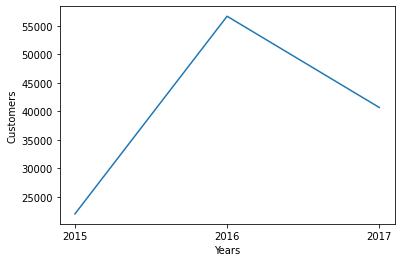

In [11]:
newdict = data['arrival_date_year'].value_counts().to_dict()

X = []
Y = []

for key,value in sorted(newdict.items()):
    X.append(str(key))
    Y.append(value)

plt.xlabel("Years")
plt.ylabel("Customers") 
plt.plot(X,Y)

#### The graph shows a fall in customer numbers but we donot have all the data of 2017 hence the counts dont include months after August

4.2 We conlcuded that the most frequent visits were from customers in the UK, Portugal adn Spain. Lets visualize how many visits they have had over the years

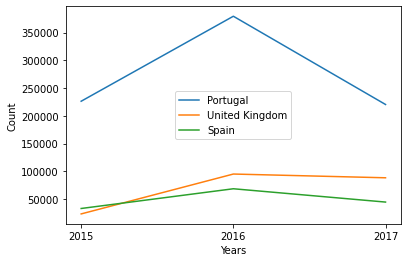

In [12]:
years = list(data["arrival_date_year"].unique())
X = []

for year in years:
    X.append(str(year))
    
Y1 = []
Y2 = []
Y3 = []

for year in X:
    year = int(year)
        
    total_count_y1 = data.query('arrival_date_year == ' +str(year)+ ' and country == "PRT"').size
    Y1.append(total_count_y1)
    
    total_count_y2 = data.query('arrival_date_year == ' +str(year)+ ' and country == "GBR"').size
    Y2.append(total_count_y2)    

    total_count_y3 = data.query('arrival_date_year == ' +str(year)+ ' and country == "ESP"').size
    Y3.append(total_count_y3)   
    
plt.xlabel("Years")
plt.ylabel("Count") 

plt.plot(X,Y1, label = "Portugal")
plt.plot(X,Y2, label = "United Kingdom")
plt.plot(X,Y3, label = "Spain")

plt.legend()


#### Portugal has the highest number of returning customers however they took a steep dive in 2017. UK customers have gradually increased and customers from Spain have dropped a bit. 

4.3 Showing the number of visits in 2015, 2016 and 2017 month wise using bar graphs.

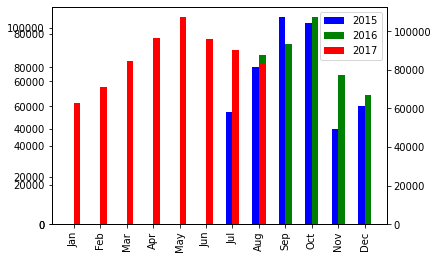

In [13]:
import datetime

X = []
month_list = []

for i in range(1,13):
    month_list.append(datetime.date(2020, i, 1).strftime('%B'))
    X.append(datetime.date(2020, i, 1).strftime('%b'))
    
Y1 = []
Y2 = []
Y3 = []

for month in month_list:
    month = str(month)
    
    try:
        total_count_y1 = data.query('arrival_date_month == "' +str(month)+ '" and arrival_date_year == 2015').size
        Y1.append(total_count_y1)
    except:
        Y1.append(0)
    
    try:
        total_count_y2 = data.query('arrival_date_month == "' +str(month)+ '" and arrival_date_year == 2016').size
        Y2.append(total_count_y2)
    except:
        Y2.append(0)

    try:
        total_count_y3 = data.query('arrival_date_month == "' +str(month)+ '" and arrival_date_year == 2017').size
        Y3.append(total_count_y3)
    except:
        Y3.append(0)

data = [Y1, Y2, Y3]

x = np.arange(12)
ax1 = plt.subplot(1,1,1)
w = 0.25

plt.xticks(x + w /2, X, rotation='vertical')
data2015 =ax1.bar(x, data[0], width=w, color='b', align='center')

ax2 = ax1.twinx()
data2016 =ax2.bar(x + w, data[1], width=w,color='g',align='center')

ax3 = ax2.twinx()
data2017 =ax3.bar(x + w, data[2], width=w,color='r',align='center')

plt.legend([data2015, data2016, data2017],['2015', '2016', '2017'])

plt.show()


#### Like the insight above proves, the maximum number of customers for 2016 and 2015 is during the months of September and October, whereas 2017 shows a not only a hike in customers but a higher number of customers as compared to 2016 and 2015.